In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Input Data

In [7]:
filename_list = ['graph_1','graph_2','graph_3','graph_4','graph_5','graph_6','ibm-5000']
def graph(filename):

  filefolder = 'C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/inputs/'
  # ------------------------ Load data ------------------------
  if filename=='ibm-5000':
    data = np.loadtxt(filefolder + filename + '.txt',dtype=int)
    data=data[:,1:]
  else:
    data = np.loadtxt(filefolder + filename + '.txt', delimiter=',',dtype=int)#指定分隔符參數
  DG = nx.DiGraph()
  node_list=[]
  for i in data:
    for j in i:
      if j not in node_list:
        node_list.append(j)
  node_list=np.sort(node_list)
  for node in node_list:
    DG.add_node(node,pr=1/len(node_list),h=1,a=1)
  for edge in data:
    DG.add_edge(edge[0],edge[1])
  # DG.add_edge(4,1) #增加邊可在這邊修改
  return DG
DG = graph(filename_list[0])

# Print Graph

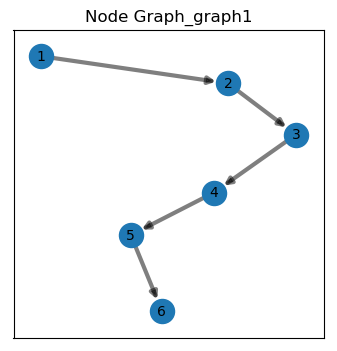

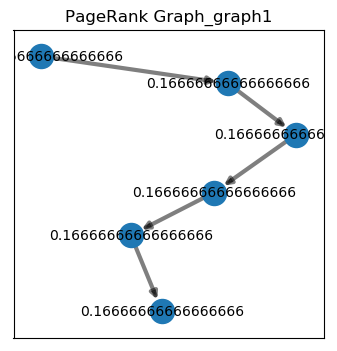

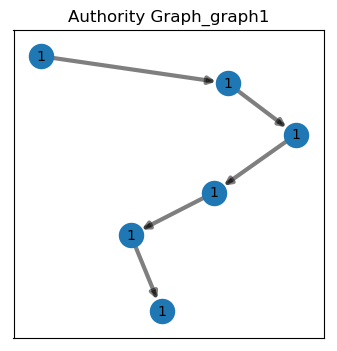

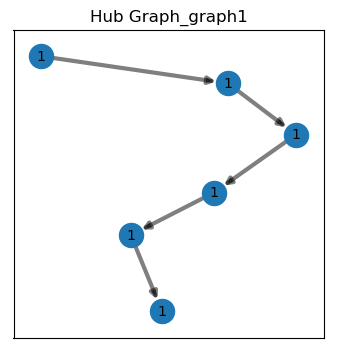

In [8]:
def plot_graph(Graph,filename):
  node_labels_pr = nx.get_node_attributes(Graph,'pr')
  node_labels_a = nx.get_node_attributes(Graph,'a')
  node_labels_h = nx.get_node_attributes(Graph,'h')

  pos = nx.spring_layout(Graph) 

  plt.figure(figsize=(4, 4))
  plt.title('Node Graph_'+filename)
  nx.draw_networkx_nodes(Graph, pos, node_size=300) # nodes
  nx.draw_networkx_edges(Graph, pos,width=3, alpha=0.5) # edge 
  nx.draw_networkx_labels(Graph, pos, font_size=10, font_family="sans-serif") # node labels
  # plt.savefig('Node Graph_'+filename+'.png')
  plt.show()

  plt.figure(figsize=(4, 4))
  plt.title('PageRank Graph_'+filename)
  nx.draw_networkx_nodes(Graph, pos, node_size=300) # nodes
  nx.draw_networkx_edges(Graph, pos,width=3, alpha=0.5) # edge 
  nx.draw_networkx_labels(Graph, pos,node_labels_pr, font_size=10, font_family="sans-serif") # node labels
  # plt.savefig('PageRank Graph_'+filename+'.png')
  plt.show()

  plt.figure(figsize=(4, 4))
  plt.title('Authority Graph_'+filename)
  nx.draw_networkx_nodes(Graph, pos, node_size=300) # nodes
  nx.draw_networkx_edges(Graph, pos,width=3, alpha=0.5) # edge
  nx.draw_networkx_labels(Graph, pos,node_labels_a, font_size=10, font_family="sans-serif") # node labels
  # plt.savefig('Authority Graph_'+filename+'.png')
  plt.show()

  plt.figure(figsize=(4, 4))
  plt.title('Hub Graph_'+filename)
  nx.draw_networkx_nodes(Graph, pos, node_size=300) # nodes
  nx.draw_networkx_edges(Graph, pos,width=3, alpha=0.5) # edge
  nx.draw_networkx_labels(Graph, pos,node_labels_h, font_size=10, font_family="sans-serif") # node labels
  # plt.savefig('Hub Graph_'+filename+'.png')
  plt.show()
  
plot_graph(DG,'graph1')

# Algorithm

In [9]:
def In_Out_matrix(Graph):
  A=[]
  for i in Graph.nodes:
    IN=[0]*len(Graph.nodes)
    for idx,j in enumerate(Graph.nodes):
      if j in Graph[i].keys():
        IN[idx]=1
    A.append(IN)
  A_out=np.array(A,dtype=float)
  A_in=np.transpose(A_out)
  return A_out,A_in

In [10]:
def pagerank(Graph, d, iteration):
  A_out,A_in = In_Out_matrix(Graph)
  for iter in range(iteration):
    old_pr=np.array(list(nx.get_node_attributes(Graph,'pr').values()),dtype=float)
    pr_sum=[]
    for i in A_in:
      count=0.0
      for idx,j in enumerate(i):
        if j==1 : #此點有連結進入
          count+=old_pr[idx]/np.sum(A_out[idx])
      pr_sum.append(count)
    pr_next=d/len(Graph.nodes)+(1-d)*np.array(pr_sum)
    for idx,i in enumerate(Graph.nodes):
      Graph.nodes[i]['pr']=pr_next[idx]/np.sum(pr_next)
    new_pr=np.array(list(nx.get_node_attributes(Graph,'pr').values()),dtype=float)
  np.set_printoptions(precision=3)
  print('pagerank ',new_pr)
  return new_pr

In [11]:
def hits(Graph, iteration):
  A_out,A_in = In_Out_matrix(Graph)
  for iter in range(iteration):
    old_a=np.array(list(nx.get_node_attributes(Graph,'a').values()),dtype=float)
    old_h=np.array(list(nx.get_node_attributes(Graph,'h').values()),dtype=float)
    a_next=np.dot(A_in,old_h)
    h_next=np.dot(A_out,old_a)
    #--------update and normalize-----------#
    for idx,i in enumerate(Graph.nodes):
      Graph.nodes[i]['a']=a_next[idx]/np.sum(a_next)
      Graph.nodes[i]['h']=h_next[idx]/np.sum(h_next)

    new_a=np.array(list(nx.get_node_attributes(Graph,'a').values()),dtype=float)
    new_h=np.array(list(nx.get_node_attributes(Graph,'h').values()),dtype=float)
  np.set_printoptions(precision=3,suppress=True)
  print('authority',new_a)
  print('hub',new_h)
  return new_a,new_h
a_values,h_values=hits(DG, iteration = 30)
pr_values = pagerank(DG, d=0.1, iteration = 30)

authority [0.  0.2 0.2 0.2 0.2 0.2]
hub [0.2 0.2 0.2 0.2 0.2 0. ]
pagerank  [0.025 0.06  0.107 0.171 0.259 0.378]


In [12]:
def simrank(Graph, c, iteration):
  n = len(Graph.nodes)
  old_sim = np.eye(n, dtype = float)
  new_sim = np.zeros(old_sim.shape)
  for iter in range(iteration):
    for idx1,i in enumerate(Graph.nodes):
      a = len(list(Graph.predecessors(i)))
      for idx2,j in enumerate(Graph.nodes):
        b = len(list(Graph.predecessors(j)))
        if (i == j):
          new_sim[idx1][idx2] = 1
        elif (a == 0) or (b == 0):
          new_sim[idx1][idx2] = 0
        else:
          sum = 0
          for k in list(Graph.predecessors(i)):
            m = list(Graph.nodes).index(k)
            for l in list(Graph.predecessors(j)):
              n = list(Graph.nodes).index(l)
              sum += old_sim[m][n]
          new_sim[idx1][idx2] = (c / (a * b))* sum
    old_sim = np.copy(new_sim)
    np.set_printoptions(precision=3)
  print('simrank:\n',new_sim)
  return new_sim
sim_values=simrank(DG, c=0.7, iteration = 30)

simrank:
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


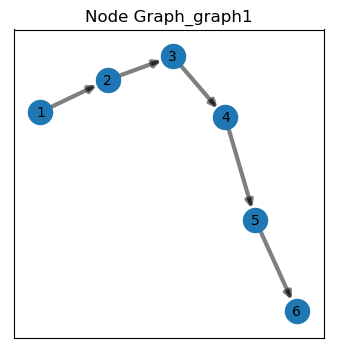

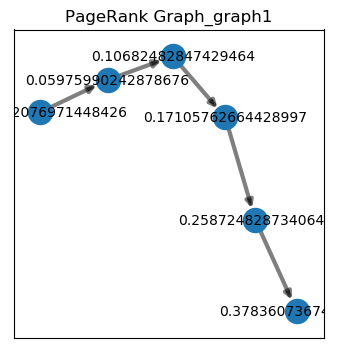

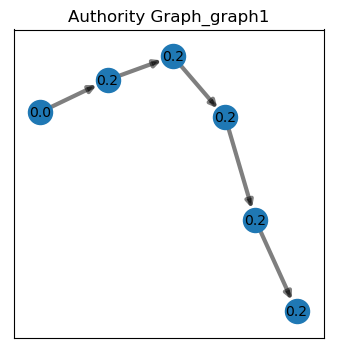

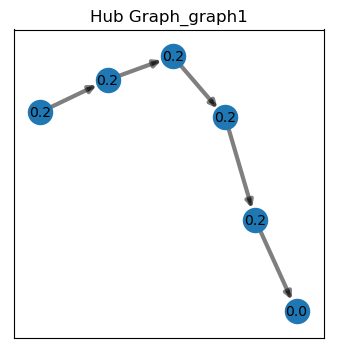

In [13]:
plot_graph(DG,'graph1')

# 效能計算

In [14]:
import time
start1 = time.time()
a_values,h_values=hits(DG, iteration = 30)
end1 = time.time()
print("Graph1_HITS 執行時間：%f 秒" % (end1 - start1))

start2 = time.time()
pr_values = pagerank(DG, d=0.1, iteration = 30)
end2 = time.time()
print("Graph1_PageRank 執行時間：%f 秒" % (end2 - start2))

start3 = time.time()
sim_values=simrank(DG, c=0.7, iteration = 30)
end3 = time.time()
print("Graph1_SimRank 執行時間：%f 秒" % (end3 - start3))

authority [0.  0.2 0.2 0.2 0.2 0.2]
hub [0.2 0.2 0.2 0.2 0.2 0. ]
Graph1_HITS 執行時間：0.002993 秒
pagerank  [0.025 0.06  0.107 0.171 0.259 0.378]
Graph1_PageRank 執行時間：0.001992 秒
simrank:
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
Graph1_SimRank 執行時間：0.003988 秒


In [15]:
filename_list = ['graph_1','graph_2','graph_3','graph_4','graph_5','graph_6','ibm-5000']
for filename in filename_list:
  filefolder = 'C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/inputs/'
  # ------------------------ Load data ------------------------
  if filename=='ibm-5000':
    data = np.loadtxt(filefolder + filename + '.txt',dtype=int)
    data=data[:,1:]
  else:
    data = np.loadtxt(filefolder + filename + '.txt', delimiter=',',dtype=int)#指定分隔符參數
  DG = nx.DiGraph()
  node_list=[]
  for i in data:
    for j in i:
      if j not in node_list:
        node_list.append(j)
  node_list=np.sort(node_list)
  print(filename+"'s number of node",len(node_list))
  print(filename+"'s number of edge",len(data))
  for node in node_list:
    DG.add_node(node,pr=1/len(node_list),h=1,a=1)
  for edge in data:
    DG.add_edge(edge[0],edge[1])

graph_1's number of node 6
graph_1's number of edge 5
graph_2's number of node 5
graph_2's number of edge 5
graph_3's number of node 4
graph_3's number of edge 6
graph_4's number of node 7
graph_4's number of edge 18
graph_5's number of node 469
graph_5's number of edge 1102
graph_6's number of node 1228
graph_6's number of edge 5220
ibm-5000's number of node 836
ibm-5000's number of edge 4798


# Output

[0.02527208 0.0597599  0.10682483 0.17105763 0.25872483 0.37836074]
[0.  0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2 0. ]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


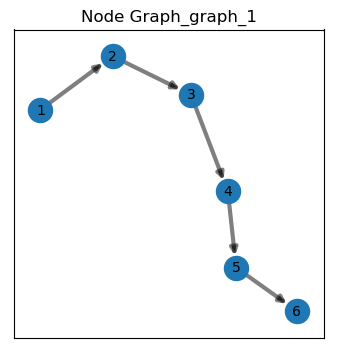

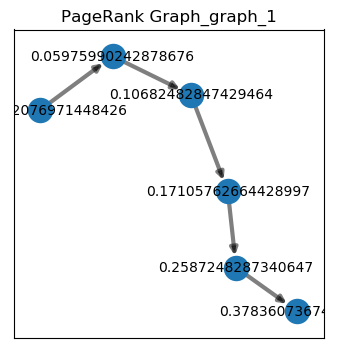

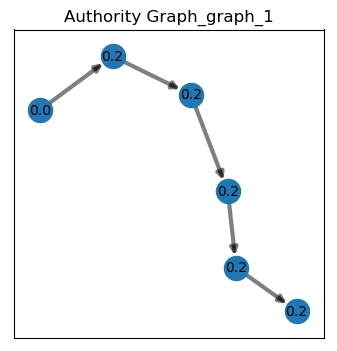

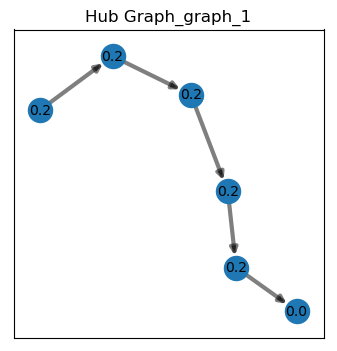

[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


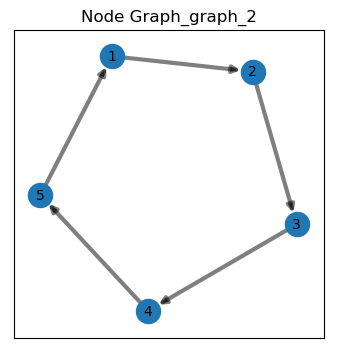

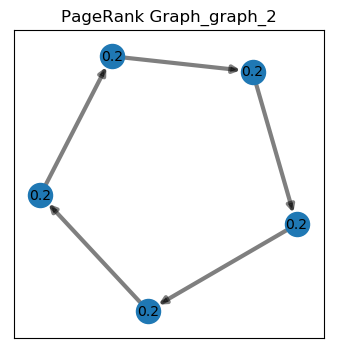

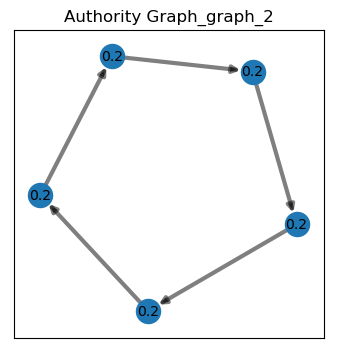

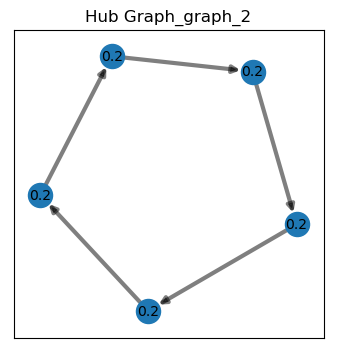

[0.17241379 0.32758621 0.32758621 0.17241379]
[0.19098301 0.30901699 0.30901699 0.19098301]
[0.19098301 0.30901699 0.30901699 0.19098301]
[[1.         0.         0.53846154 0.        ]
 [0.         1.         0.         0.53846154]
 [0.53846154 0.         1.         0.        ]
 [0.         0.53846154 0.         1.        ]]


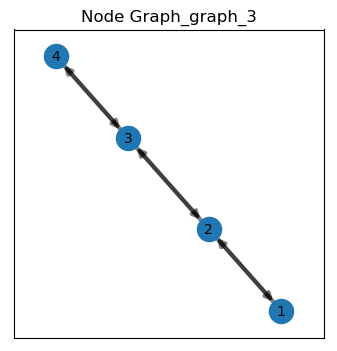

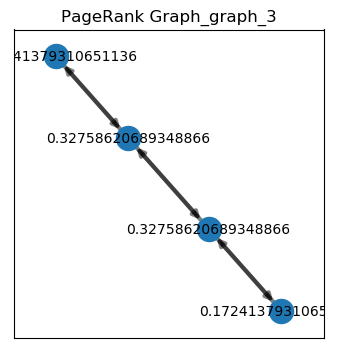

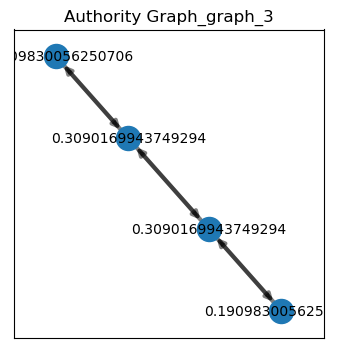

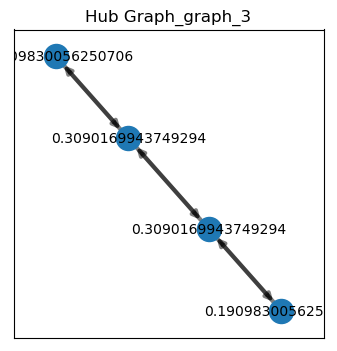

[0.2880119  0.16104085 0.13942021 0.10724631 0.1827487  0.05540417
 0.06612786]
[0.13948392 0.17791202 0.2008232  0.14017776 0.20142535 0.05608927
 0.08408848]
[0.27545313 0.04776234 0.10868326 0.19865952 0.18373463 0.11673473
 0.06897239]
[[1.         0.24268552 0.23232285 0.23880712 0.22135258 0.3027669
  0.17484735]
 [0.24268552 1.         0.29370958 0.25640925 0.29525381 0.16955486
  0.34326364]
 [0.23232285 0.29370958 1.         0.33966537 0.27540587 0.33862683
  0.34070391]
 [0.23880712 0.25640925 0.33966537 1.         0.22990535 0.42747339
  0.42747339]
 [0.22135258 0.29525381 0.27540587 0.22990535 1.         0.15943698
  0.30037372]
 [0.3027669  0.16955486 0.33862683 0.42747339 0.15943698 1.
  0.15494678]
 [0.17484735 0.34326364 0.34070391 0.42747339 0.30037372 0.15494678
  1.        ]]
[0.00038006 0.00038006 0.00038006 0.00038006 0.00038006 0.0004817
 0.00044105 0.00046718 0.00053252 0.00053252 0.00046718 0.00044105
 0.00053252 0.00053252 0.00044105 0.0004079  0.00041408 0.000

In [31]:
filename_list = ['graph_1','graph_2','graph_3','graph_4','graph_5','graph_6','ibm-5000']
for filename in filename_list:
  DG = graph(filename)
  pr_values = pagerank(DG, d=0.1, iteration = 30)
  a_values,h_values=hits(DG, iteration = 30)
  if filename not in ['graph_6','ibm-5000']:
    sim_values=simrank(DG, c=0.7, iteration = 30)
  # ------------------------- Write file -------------------------
  # Write file authority.txt
  np.savetxt('C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/results/'+ filename + '/' + filename + '_HITS_authority.txt', a_values, fmt='%.3f',newline=' ')
  # Write file hub.txt
  np.savetxt('C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/results/'+ filename + '/' + filename + '_HITS_hub.txt', h_values, fmt='%.3f',newline=' ')
  # Write file PageRank.txt
  np.savetxt('C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/results/'+ filename + '/' + filename + '_PageRank.txt', pr_values, fmt='%.3f',newline=' ')
  # Write file SimRank.txt
  if filename not in ['graph_6','ibm-5000']:
    np.savetxt('C:/Users/poetr/OneDrive/桌面/N26114277_DMProject3/results/'+ filename + '/' + filename + '_SimRank.txt', sim_values, fmt='%.3f')